# Zadanie rekrutacyjne dla Trans.eu

## Import potrzebnych bibliotek

In [515]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

## Wczytanie danych oraz wstępna eksploracja

In [516]:
dataset = pd.read_csv('Zadanie Data Analyst.csv')

In [517]:
dataset.head()

,Osoba,Data,Zespół,Wskaźnik 1,Cel 1,Wskaźnik 2,Cel 2,Wskaźnik 3,Cel 3,Wskaźnik 4,Cel 4
0,Osoba 1,VII-20,A,21,21.5,1,9.8,0,4.9,0,6.1
1,Osoba 2,VII-20,A,21,21.5,11,9.8,0,4.9,6,6.1
2,Osoba 3,VII-20,A,33,17.6,7,8.0,1,4.0,5,5.0
3,Osoba 4,VII-20,A,21,21.5,6,9.8,1,4.9,10,6.1
4,Osoba 5,VII-20,A,12,21.5,4,9.8,0,4.9,4,6.1


In [518]:
dataset.describe()

,Wskaźnik 1,Cel 1,Wskaźnik 2,Cel 2,Wskaźnik 3,Cel 3,Wskaźnik 4,Cel 4
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,7.357576,16.398788,1.848485,7.040606,0.103030,2.798182,2.715152,3.977576
std,9.675183,4.655288,3.053599,3.098365,0.342591,1.436182,3.579764,2.111708
min,0.000000,4.400000,0.000000,1.500000,0.000000,0.700000,0.000000,0.000000
25%,0.000000,14.400000,0.000000,4.000000,0.000000,1.600000,0.000000,1.900000
50%,3.000000,17.600000,0.000000,8.000000,0.000000,2.400000,1.000000,4.100000
75%,11.000000,20.900000,3.000000,9.800000,0.000000,4.000000,4.000000,6.100000
max,51.000000,25.500000,16.000000,14.700000,2.000000,4.900000,17.000000,8.500000


In [519]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Osoba       165 non-null    object 
 1   Data        165 non-null    object 
 2   Zespół      165 non-null    object 
 3   Wskaźnik 1  165 non-null    int64  
 4   Cel 1       165 non-null    float64
 5   Wskaźnik 2  165 non-null    int64  
 6   Cel 2       165 non-null    float64
 7   Wskaźnik 3  165 non-null    int64  
 8   Cel 3       165 non-null    float64
 9   Wskaźnik 4  165 non-null    int64  
 10  Cel 4       165 non-null    float64
dtypes: float64(4), int64(4), object(3)
memory usage: 14.3+ KB


* brak brakujacych danych
* odpowiednie formaty danych poza kolumną Data

## Porządek z kolumną Data

In [520]:
months_dict = {'I': '01',
               'II': '02',
               'III': '03',
               'IV': '04',
               'V': '05',
               'VI': '06',
               'VII': '07',
               'VIII': '08',
               'IX': '09',
               'X': '10',
               'XI': '11',
               'XII': '12'}
dataset['Miesiąc'] = dataset['Data'].map(lambda x: str(x)[:-3])
dataset['Miesiąc_2'] = dataset.Miesiąc.map(months_dict)
dataset['Rok'] = dataset['Data'].map(lambda x: str(x)[len(str(x)) - 2:])
dataset['Data'] = '01-' + dataset['Miesiąc_2'] + '-20' + dataset['Rok']
dataset['Data'] = pd.to_datetime(dataset['Data'], format='%d-%m-%Y').dt.date
dataset.drop(['Miesiąc', 'Miesiąc_2', 'Rok'], axis=1, inplace=True)

In [521]:
dataset.head(6)

,Osoba,Data,Zespół,Wskaźnik 1,Cel 1,Wskaźnik 2,Cel 2,Wskaźnik 3,Cel 3,Wskaźnik 4,Cel 4
0,Osoba 1,2020-07-01,A,21,21.5,1,9.8,0,4.9,0,6.1
1,Osoba 2,2020-07-01,A,21,21.5,11,9.8,0,4.9,6,6.1
2,Osoba 3,2020-07-01,A,33,17.6,7,8.0,1,4.0,5,5.0
3,Osoba 4,2020-07-01,A,21,21.5,6,9.8,1,4.9,10,6.1
4,Osoba 5,2020-07-01,A,12,21.5,4,9.8,0,4.9,4,6.1
5,Osoba 6,2020-07-01,A,37,12.8,5,5.8,0,2.9,4,3.6


## Stworzenie danych o indywidualnej procentowej realizacji celów

In [522]:
dataset_realizacja = dataset.copy()
dataset_realizacja['Realizacja 1'] = round(100.0 * dataset_realizacja['Wskaźnik 1'] / dataset_realizacja['Cel 1'], 2).where(dataset_realizacja['Cel 1'] > 0, 100.00)
dataset_realizacja['Realizacja 2'] = round(100.0 * dataset_realizacja['Wskaźnik 2'] / dataset_realizacja['Cel 2'], 2).where(dataset_realizacja['Cel 2'] > 0, 100.00)
dataset_realizacja['Realizacja 3'] = round(100.0 * dataset_realizacja['Wskaźnik 3'] / dataset_realizacja['Cel 3'], 2).where(dataset_realizacja['Cel 3'] > 0, 100.00)
dataset_realizacja['Realizacja 4'] = round(100.0 * dataset_realizacja['Wskaźnik 4'] / dataset_realizacja['Cel 4'], 2).where(dataset_realizacja['Cel 4'] > 0, 100.00)
dataset_realizacja['Czy realizacja 1'] = 1 * (dataset_realizacja['Realizacja 1'] >= 100)
dataset_realizacja['Czy realizacja 2'] = 1 * (dataset_realizacja['Realizacja 2'] >= 100)
dataset_realizacja['Czy realizacja 3'] = 1 * (dataset_realizacja['Realizacja 3'] >= 100)
dataset_realizacja['Czy realizacja 4'] = 1 * (dataset_realizacja['Realizacja 4'] >= 100)
dataset_realizacja.drop(['Wskaźnik 1', 'Cel 1',
                         'Wskaźnik 2', 'Cel 2',
                         'Wskaźnik 3', 'Cel 3',
                         'Wskaźnik 4', 'Cel 4'], axis=1, inplace=True)

In [523]:
dataset_realizacja.head()

,Osoba,Data,Zespół,Realizacja 1,Realizacja 2,Realizacja 3,Realizacja 4,Czy realizacja 1,Czy realizacja 2,Czy realizacja 3,Czy realizacja 4
0,Osoba 1,2020-07-01,A,97.67,10.20,0.00,0.00,0,0,0,0
1,Osoba 2,2020-07-01,A,97.67,112.24,0.00,98.36,0,1,0,0
2,Osoba 3,2020-07-01,A,187.50,87.50,25.00,100.00,1,0,0,1
3,Osoba 4,2020-07-01,A,97.67,61.22,20.41,163.93,0,0,0,1
4,Osoba 5,2020-07-01,A,55.81,40.82,0.00,65.57,0,0,0,0


## Wyliczenie metryk realizacji miesięcznie dla zespołów

In [553]:
licznosc_zespolow = dataset_realizacja.groupby(['Zespół', 'Data'])[['Osoba']].count()
licznosc_zespolow.reset_index()

,Zespół,Data,Osoba
0,A,2020-07-01,9
1,A,2020-08-01,9
2,A,2020-09-01,9
3,A,2020-10-01,9
4,A,2020-11-01,9
5,B,2020-07-01,9
6,B,2020-08-01,9
7,B,2020-09-01,9
8,B,2020-10-01,9
9,B,2020-11-01,9


In [554]:
realizacja_sumarycznie = dataset_realizacja.groupby(['Zespół', 'Data'])[['Czy realizacja 1',
                                                                         'Czy realizacja 2',
                                                                         'Czy realizacja 3',
                                                                         'Czy realizacja 4']].sum()
realizacja_sumarycznie.reset_index()

,Zespół,Data,Czy realizacja 1,Czy realizacja 2,Czy realizacja 3,Czy realizacja 4
0,A,2020-07-01,4,2,0,4
1,A,2020-08-01,3,1,0,6
2,A,2020-09-01,2,0,0,6
3,A,2020-10-01,6,1,0,4
4,A,2020-11-01,1,1,1,4
5,B,2020-07-01,0,2,0,4
6,B,2020-08-01,0,1,0,1
7,B,2020-09-01,0,0,0,3
8,B,2020-10-01,2,0,0,4
9,B,2020-11-01,0,1,0,3


In [555]:
sr_real_zespol_w_czasie = round(dataset_realizacja.groupby(['Zespół', 'Data'])[['Realizacja 1',
                                                                                'Realizacja 2',
                                                                                'Realizacja 3',
                                                                                'Realizacja 4']].mean(), 2)
sr_real_zespol_w_czasie.columns = ['Śr realizacja 1', 'Śr realizacja 2', 'Śr realizacja 3', 'Śr realizacja 4']

med_real_zespol_w_czasie = round(dataset_realizacja.groupby(['Zespół', 'Data'])[['Realizacja 1',
                                                                                 'Realizacja 2',
                                                                                 'Realizacja 3',
                                                                                 'Realizacja 4']].median(), 2)
med_real_zespol_w_czasie.columns = ['Med realizacja 1', 'Med realizacja 2', 'Med realizacja 3', 'Med realizacja 4']

std_real_zespol_w_czasie = round(dataset_realizacja.groupby(['Zespół', 'Data'])[['Realizacja 1',
                                                                                 'Realizacja 2',
                                                                                 'Realizacja 3',
                                                                                 'Realizacja 4']].std(), 2)
std_real_zespol_w_czasie.columns = ['Std realizacja 1', 'Std realizacja 2', 'Std realizacja 3', 'Std realizacja 4']

In [556]:
stat_real_zespol_w_czasie = pd.concat([sr_real_zespol_w_czasie, std_real_zespol_w_czasie, med_real_zespol_w_czasie],
                                      axis=1)
stat_real_zespol_w_czasie = stat_real_zespol_w_czasie.reindex(
    ['Śr realizacja 1', 'Med realizacja 1', 'Std realizacja 1',
     'Śr realizacja 2', 'Med realizacja 2', 'Std realizacja 2',
     'Śr realizacja 3', 'Med realizacja 3', 'Std realizacja 3',
     'Śr realizacja 4', 'Med realizacja 4', 'Std realizacja 4'],
    axis=1)
stat_real_zespol_w_czasie = stat_real_zespol_w_czasie.reset_index()

In [526]:
stat_real_zespol_w_czasie

,Zespół,Data,Śr realizacja 1,Med realizacja 1,Std realizacja 1,Śr realizacja 2,Med realizacja 2,Std realizacja 2,Śr realizacja 3,Med realizacja 3,Std realizacja 3,Śr realizacja 4,Med realizacja 4,Std realizacja 4
0,A,2020-07-01,139.13,97.67,75.18,76.57,86.21,41.39,7.82,0.0,11.81,86.55,98.36,58.92
1,A,2020-08-01,84.79,83.33,35.11,40.58,34.48,30.15,0.00,0.0,0.00,100.91,120.00,68.51
2,A,2020-09-01,77.76,68.18,47.68,33.69,15.15,34.84,6.10,0.0,12.60,108.50,131.15,74.91
3,A,2020-10-01,105.92,117.65,77.32,51.47,34.01,40.67,21.76,0.0,33.71,144.86,87.72,137.80
4,A,2020-11-01,48.75,33.49,54.15,24.62,13.61,30.76,13.89,0.0,41.67,78.75,72.46,49.97
5,B,2020-07-01,6.34,0.00,9.63,56.89,40.82,70.30,7.82,0.0,17.20,89.49,65.57,86.87
6,B,2020-08-01,10.80,0.00,20.87,31.04,10.20,39.37,8.92,0.0,13.47,50.21,24.39,71.52
7,B,2020-09-01,7.98,0.00,13.65,21.83,20.41,22.72,0.00,0.0,0.00,71.15,32.79,88.81
8,B,2020-10-01,73.30,41.67,116.97,17.99,0.00,32.40,5.56,0.0,16.67,81.13,52.63,73.86
9,B,2020-11-01,19.24,7.81,19.28,18.71,0.00,34.50,0.00,0.0,0.00,51.97,52.63,55.22


In [527]:
data = pd.Timestamp(year=2020, month=10, day=1).date()
stat_real_zespol_w_czasie[real_zespol_w_czasie['Data'] == data]

,Zespół,Data,Śr realizacja 1,Med realizacja 1,Std realizacja 1,Śr realizacja 2,Med realizacja 2,Std realizacja 2,Śr realizacja 3,Med realizacja 3,Std realizacja 3,Śr realizacja 4,Med realizacja 4,Std realizacja 4
3,A,2020-10-01,105.92,117.65,77.32,51.47,34.01,40.67,21.76,0.0,33.71,144.86,87.72,137.80
8,B,2020-10-01,73.30,41.67,116.97,17.99,0.00,32.40,5.56,0.0,16.67,81.13,52.63,73.86
13,C,2020-10-01,42.60,18.54,53.64,12.57,0.00,23.81,0.00,0.0,0.00,35.48,16.39,51.88


In [528]:
stat_real_zespol_w_czasie[real_zespol_w_czasie['Zespół'] == 'A']

,Zespół,Data,Śr realizacja 1,Med realizacja 1,Std realizacja 1,Śr realizacja 2,Med realizacja 2,Std realizacja 2,Śr realizacja 3,Med realizacja 3,Std realizacja 3,Śr realizacja 4,Med realizacja 4,Std realizacja 4
0,A,2020-07-01,139.13,97.67,75.18,76.57,86.21,41.39,7.82,0.0,11.81,86.55,98.36,58.92
1,A,2020-08-01,84.79,83.33,35.11,40.58,34.48,30.15,0.00,0.0,0.00,100.91,120.00,68.51
2,A,2020-09-01,77.76,68.18,47.68,33.69,15.15,34.84,6.10,0.0,12.60,108.50,131.15,74.91
3,A,2020-10-01,105.92,117.65,77.32,51.47,34.01,40.67,21.76,0.0,33.71,144.86,87.72,137.80
4,A,2020-11-01,48.75,33.49,54.15,24.62,13.61,30.76,13.89,0.0,41.67,78.75,72.46,49.97


## Wizualizacja danych - boxplot

In [531]:
realizacje = sorted([col for col in set(dataset_realizacja.columns) if col[0:10] == 'Realizacja'])
zespoly = list(dataset_realizacja.Zespół.drop_duplicates())

In [532]:
realizacje

['Realizacja 1', 'Realizacja 2', 'Realizacja 3', 'Realizacja 4']

In [533]:
zespoly

['A', 'B', 'C']

In [534]:
def generuj_boxplot_zespol(dataset: pd.DataFrame, zespol: str, realizacje: list):
    fig, axes = plt.subplots(nrows=len(realizacje), ncols=1, sharex=True, figsize=(10, 10))
    for realizacja, ax in zip(realizacje, axes):
        sns.boxplot(data=dataset[dataset.Zespół == zespol], x='Data', y=realizacja,
                    color='cornflowerblue', ax=ax)
        ax.axhline(100, 0, 1, color='gray', linestyle='--', linewidth=1)
        ax.set_ylabel(realizacja)
        ax.set_xlabel('')
    fig.suptitle('Realizacje zespołu %s w czasie' % zespol, fontsize=18)
    fig.text(0.5, 0.04, 'Data', ha='center', va='center')
    # fig.text(0.06, 0.5, 'Realizacja', ha='center', va='center', rotation='vertical')
    fig.subplots_adjust(left=0.2, bottom=0.1, right=0.8, top=0.95, wspace=0.1, hspace=0.1)

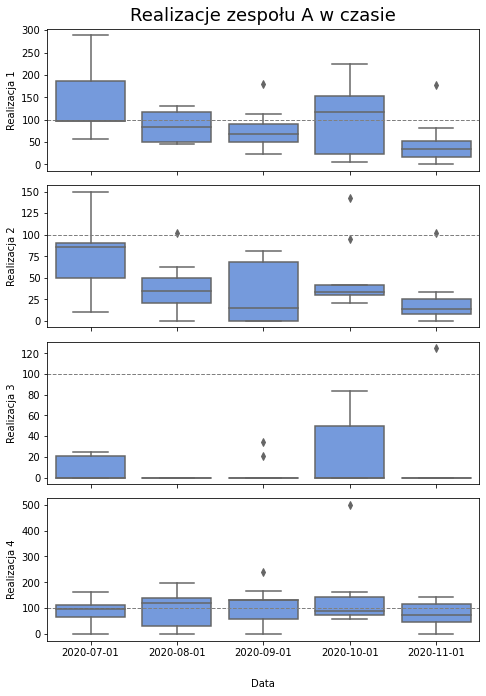

In [535]:
generuj_boxplot_zespol(dataset_realizacja, zespoly[0], realizacje)

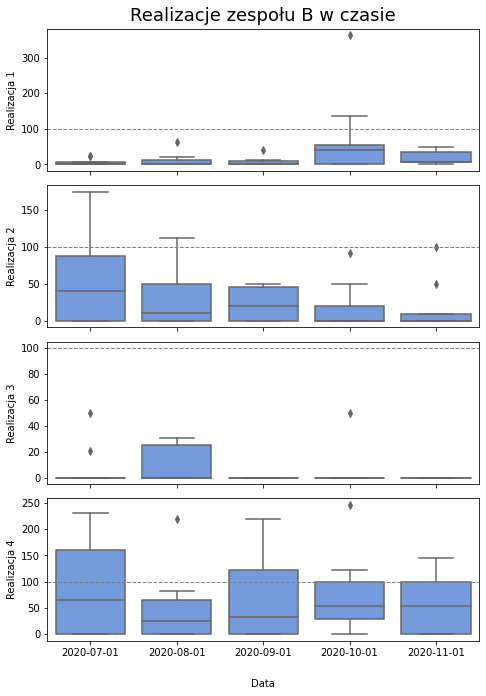

In [536]:
generuj_boxplot_zespol(dataset_realizacja, zespoly[1], realizacje)

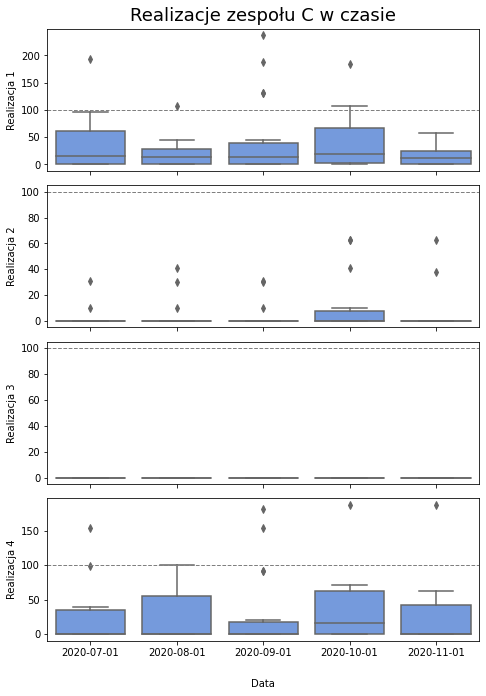

In [537]:
generuj_boxplot_zespol(dataset_realizacja, zespoly[2], realizacje)

In [538]:
dataset[dataset.Zespół == 'C'][['Osoba', 'Data', 'Zespół', 'Wskaźnik 3', 'Cel 3']]

,Osoba,Data,Zespół,Wskaźnik 3,Cel 3
18,Osoba 19,2020-07-01,C,0,1.6
19,Osoba 20,2020-07-01,C,0,2.0
20,Osoba 21,2020-07-01,C,0,2.0
21,Osoba 22,2020-07-01,C,0,2.0
22,Osoba 23,2020-07-01,C,0,1.6
...,...,...,...,...,...
160,Osoba 29,2020-11-01,C,0,4.0
161,Osoba 30,2020-11-01,C,0,3.3
162,Osoba 31,2020-11-01,C,0,4.0
163,Osoba 32,2020-11-01,C,0,3.3


## Wizualizacja danych - wykres liniowy w czasie

In [539]:
def generuj_wykres_liniowy_zespol(dataset: pd.DataFrame, zespol: str, realizacje: list):
    fig, axes = plt.subplots(nrows=len(realizacje), ncols=1, sharex=True, figsize=(10, 7))
    for realizacja, ax in zip(realizacje, axes):
        sns.lineplot(data=dataset[dataset.Zespół == zespol], x='Data', y=realizacja,
                     hue='Osoba', marker='o', markersize=5, ax=ax)
        ax.get_legend().set_visible(False)
        for tick in ax.get_xticklabels():
            tick.set_rotation(45)
    fig.suptitle('Realizacja w czasie dla zespołu %s' % zespol, fontsize=18)
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='right', fontsize=13)
    fig.subplots_adjust(left=0.2, bottom=0, right=0.8, top=0.9, wspace=0.1, hspace=0.25)

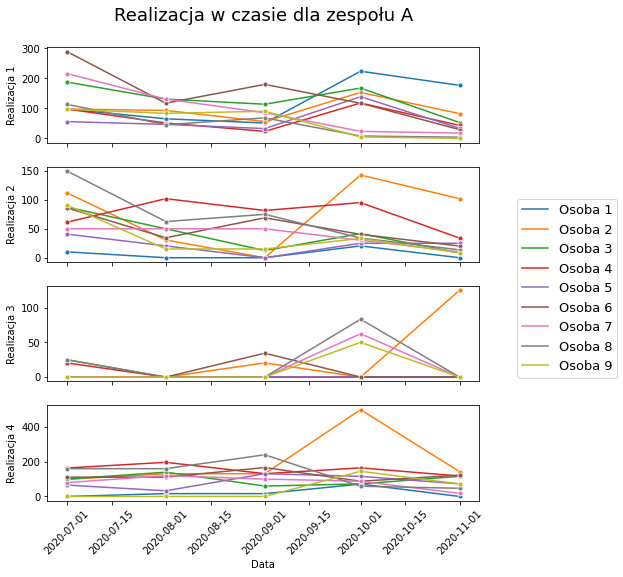

In [540]:
generuj_wykres_liniowy_zespol(dataset_realizacja, zespoly[0], realizacje)

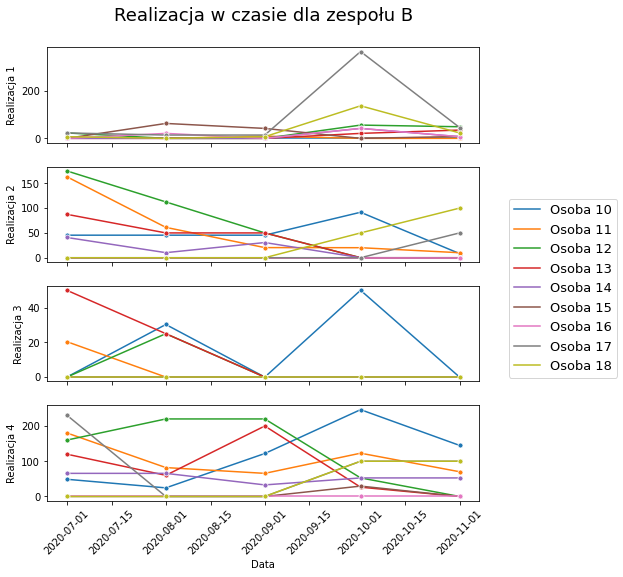

In [541]:
generuj_wykres_liniowy_zespol(dataset_realizacja, zespoly[1], realizacje)

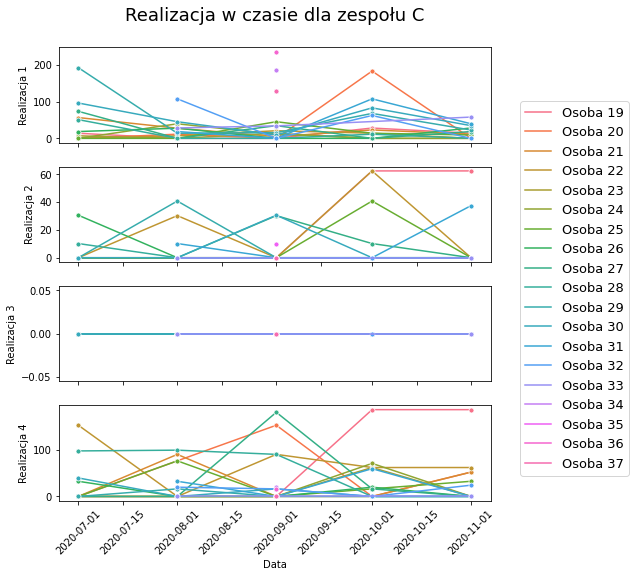

In [542]:
generuj_wykres_liniowy_zespol(dataset_realizacja, zespoly[2], realizacje)

## Wizualizacja danych - histogram oraz estymator jądrowy gęstości

In [543]:
def generuj_histogram_zespol(dataset: pd.DataFrame, realizacja: str):
    daty = dataset.Data.drop_duplicates()
    fig, axes = plt.subplots(nrows=len(daty), ncols=1, sharex=True, figsize=(10, 10))
    for data, ax in zip(daty, axes):
        sns.histplot(data=dataset[(dataset.Data == data)], x=realizacja,
                     bins=range(0, 300, 10), hue='Zespół', fill=True, linewidth=0.5, alpha=0.6, ax=ax)
        ax.axvline(100, 0, 1, color='indianred', linestyle='--', linewidth=1.5)
        ax.set_ylabel(data)
        ax.set_xlabel('')
    fig.suptitle(realizacja, fontsize=18)
    fig.subplots_adjust(left=0.2, bottom=0, right=0.8, top=0.95, wspace=0.01, hspace=0.1)

In [544]:
def generuj_gestosc_zespol(dataset: pd.DataFrame, realizacja: str):
    daty = dataset.Data.drop_duplicates()
    fig, axes = plt.subplots(nrows=len(daty), ncols=1, sharex=True, figsize=(10, 10))
    for data, ax in zip(daty, axes):
        sns.kdeplot(data=dataset[(dataset.Data == data)], x=realizacja,
                    hue='Zespół', bw_adjust=0.5, fill=True, linewidth=0, alpha=0.5, ax=ax,
                    warn_singular=False)
        ax.axvline(100, 0, 1, color='indianred', linestyle='--', linewidth=1.5)
        ax.set_ylim(0, 0.025)
        ax.set_xlim(-50, 200)
        ax.set_ylabel(data)
        ax.set_xlabel('')
    fig.suptitle(realizacja, fontsize=18)
    fig.subplots_adjust(left=0.2, bottom=0, right=0.8, top=0.95, wspace=0.01, hspace=0.1)

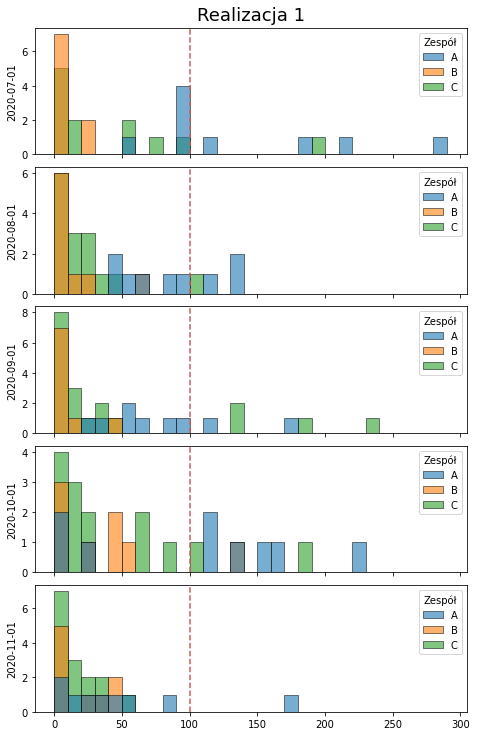

In [545]:
generuj_histogram_zespol(dataset_realizacja, realizacje[0])

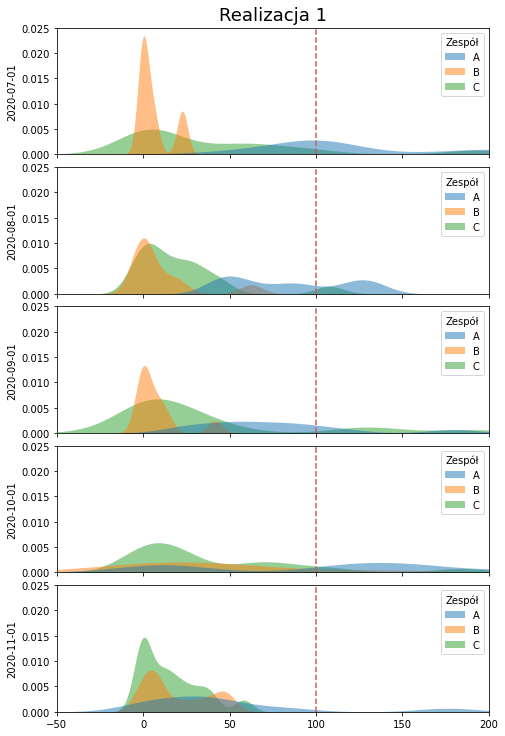

In [546]:
generuj_gestosc_zespol(dataset_realizacja, realizacje[0])

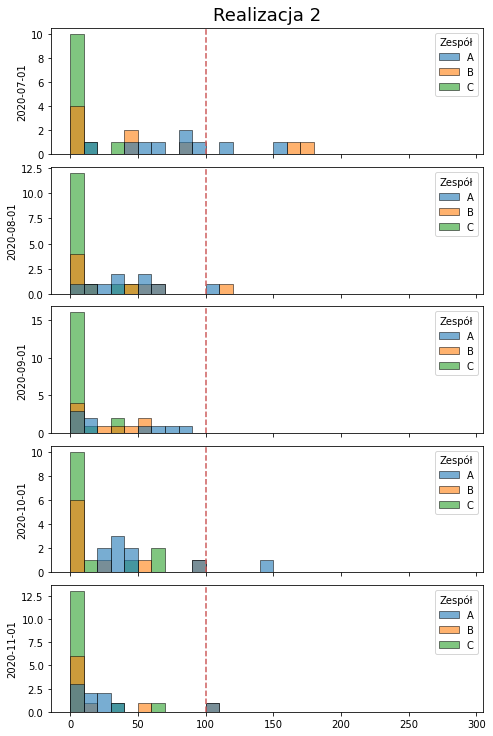

In [547]:
generuj_histogram_zespol(dataset_realizacja, realizacje[1])

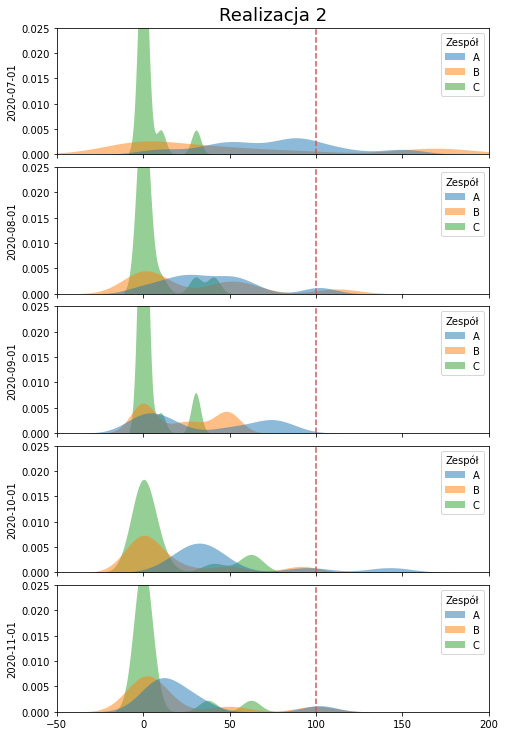

In [548]:
generuj_gestosc_zespol(dataset_realizacja, realizacje[1])

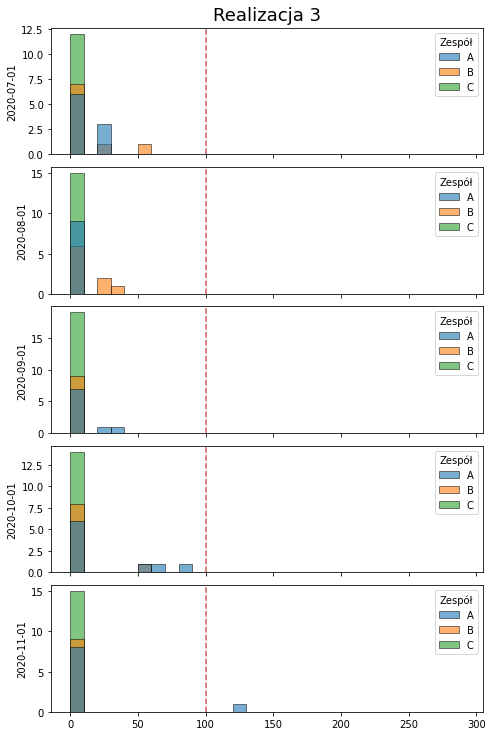

In [549]:
generuj_histogram_zespol(dataset_realizacja, realizacje[2])

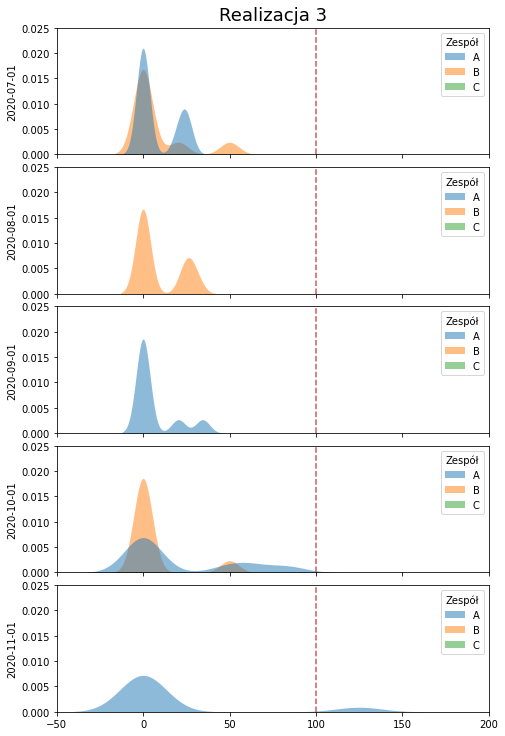

In [550]:
generuj_gestosc_zespol(dataset_realizacja, realizacje[2])

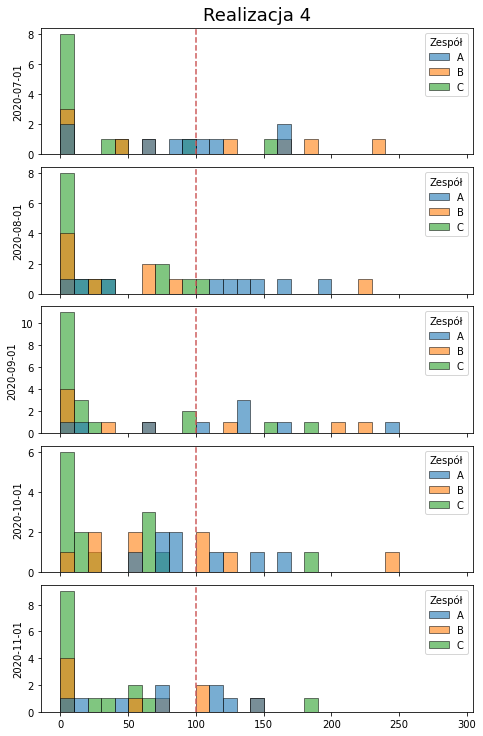

In [551]:
generuj_histogram_zespol(dataset_realizacja, realizacje[3])

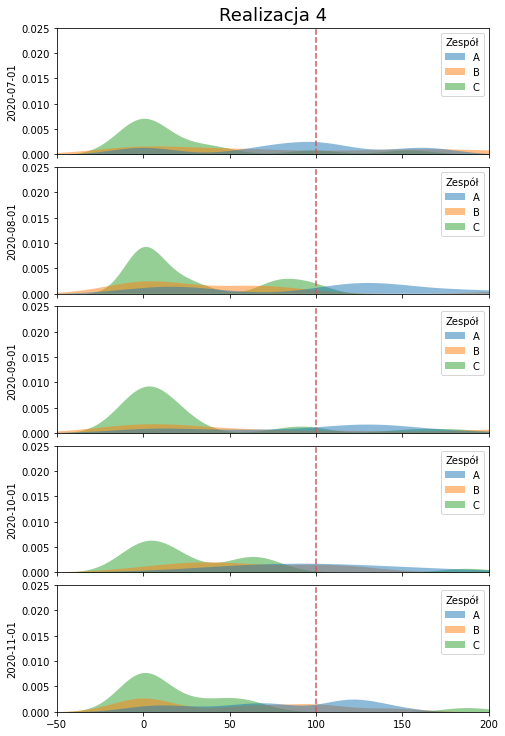

In [552]:
generuj_gestosc_zespol(dataset_realizacja, realizacje[3])